In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/Credit.csv")
df.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


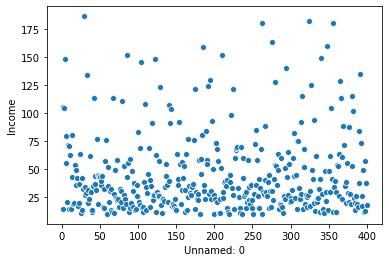

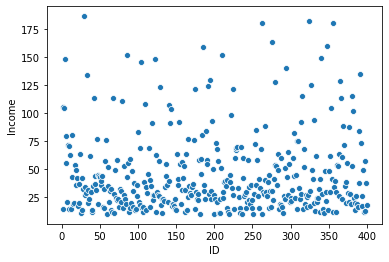

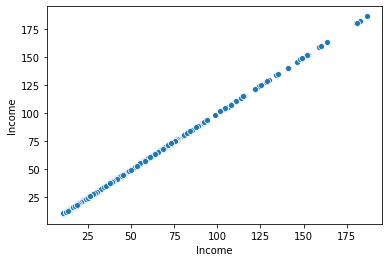

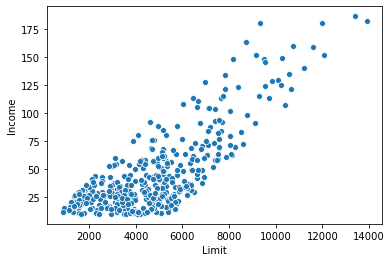

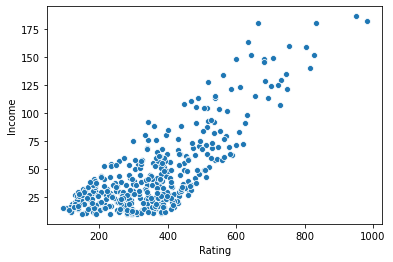

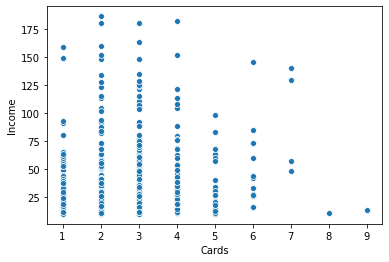

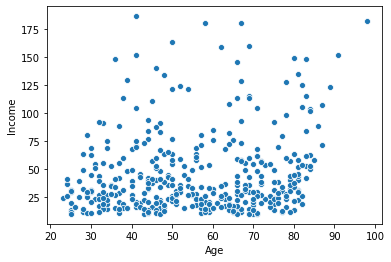

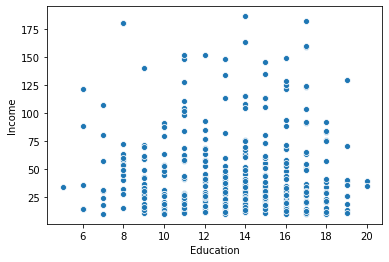

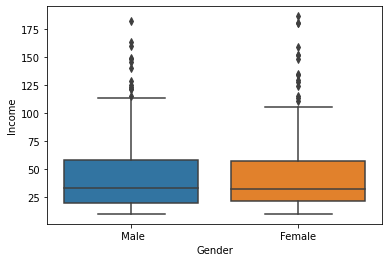

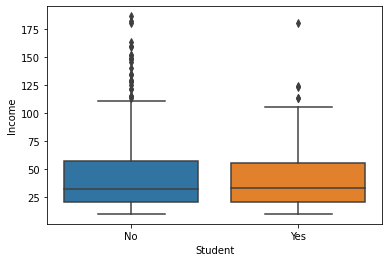

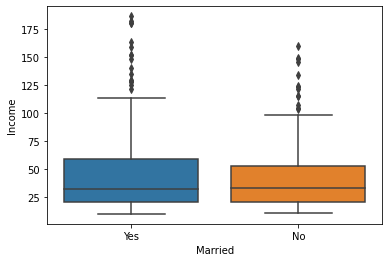

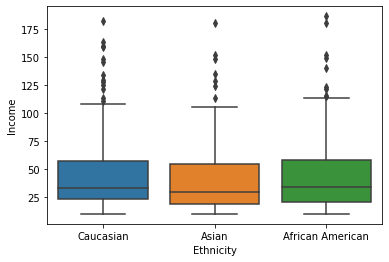

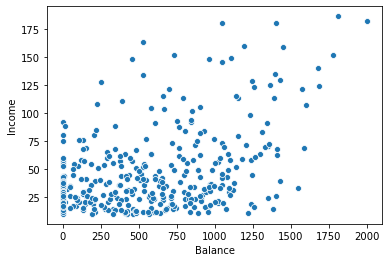

In [3]:
import seaborn as sb
from matplotlib import pyplot as plt
for i in df.columns:
    if df[i].dtypes=='object':
        sb.boxplot(df[i], df.Income)
        plt.show()
    else:
        sb.scatterplot(df[i], df.Income)
        plt.show()

In [4]:
df.corr()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Balance
Unnamed: 0,1.000000,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
ID,1.000000,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
Income,0.037203,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.024172,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.021985,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.036304,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.058603,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.001415,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.006064,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


In [5]:
for i in df:
    print(i)

Unnamed: 0
ID
Income
Limit
Rating
Cards
Age
Education
Gender
Student
Married
Ethnicity
Balance


In [6]:
y = df.Income
X = df[["Limit","Rating","Cards","Age","Education","Gender","Student","Married","Ethnicity","Balance"]]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X1 = X.apply(le.fit_transform)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=40)

In [7]:
X1.head()

,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,131,99,1,11,6,0,0,1,2,67
1,317,219,2,59,10,1,1,1,1,196
2,328,231,3,48,6,0,0,0,1,126
3,369,265,2,13,6,1,0,0,1,210
4,215,143,1,45,11,0,0,1,2,66


In [8]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model = dtr.fit(X_train, y_train)
pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

9.2990125

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(dtr, out_file="C:/Users/Admin/Documents/Python Scripts/202004040800-Tree.dot")

In [11]:
# ! pip install pydotplus --user

In [12]:
import pydotplus as pdp
graph = pdp.graph_from_dot_file("C:/Users/Admin/Documents/Python Scripts/202004040800-Tree.dot")

In [15]:
from IPython.display import Image
Image(graph.create_jpg())

InvocationException: GraphViz's executables not found

In [14]:
# ! pip install graphviz --user